In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ofr_alex_path = './data/AlexNet_overflowRate-Table 1.csv'
ofr_vgg16_path = './data/Vgg16_overflowRate-Table 1.csv'

ofr_alex = pd.read_csv(ofr_alex_path)
ofr_vgg16 = pd.read_csv(ofr_vgg16_path)
ofr_alex_ndarray = np.array(ofr_alex.iloc[:3, 1:])
ofr_columns = ofr_alex.columns[1:].tolist()
ofr_x = np.arange(len(ofr_columns))
ofr_vgg16_ndarray = np.array(ofr_vgg16.iloc[:3, 1:])

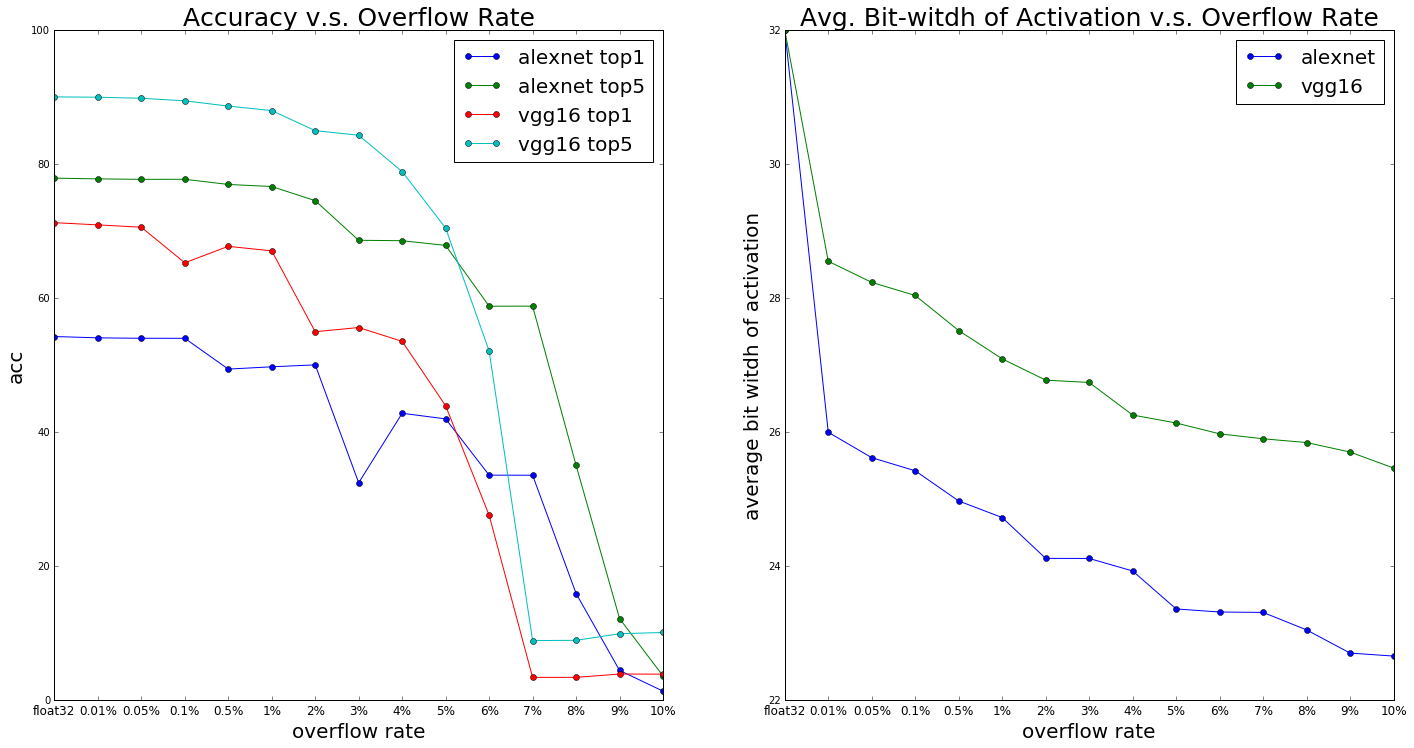

In [3]:
fig = plt.figure(figsize=(24, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(ofr_x, 100 - ofr_alex_ndarray[0], marker='o', label='alexnet top1')
ax1.plot(ofr_x, 100 - ofr_alex_ndarray[1], marker='o', label='alexnet top5')
ax1.plot(ofr_x, 100 - ofr_vgg16_ndarray[0], marker='o', label='vgg16 top1')
ax1.plot(ofr_x, 100 - ofr_vgg16_ndarray[1], marker='o', label='vgg16 top5')
ax1.set_xticks(ofr_x)
ax1.set_xticklabels(ofr_columns, fontsize=12)
ax1.set_xlabel('overflow rate', fontsize=20)
ax1.set_ylabel('acc', fontsize=20)
ax1.legend(loc='best', fontsize=20)
ax1.set_title('Accuracy v.s. Overflow Rate', fontsize=25)

ax2.plot(ofr_x, ofr_alex_ndarray[2], marker='o', label='alexnet')
ax2.plot(ofr_x, ofr_vgg16_ndarray[2], marker='o', label='vgg16')
ax2.set_xticks(ofr_x)
ax2.set_xticklabels(ofr_columns, fontsize=12)
ax2.set_xlabel('overflow rate', fontsize=20)
ax2.set_ylabel('average bit witdh of activation', fontsize=20)
ax2.legend(loc='best', fontsize=20)
ax2.set_title('Avg. Bit-witdh of Activation v.s. Overflow Rate', fontsize=25)

plt.savefig('../vis/overflow_rate.eps')
plt.show()

In [4]:
bitwidth_alex_path = './data/AlexNet_bitwidth_act-Table 1.csv'
bitwidth_alex = pd.read_csv(bitwidth_alex_path)
bitwidth_alex_ndarray = np.array(bitwidth_alex.iloc[:, 1:])
bitwidth_alex_columns = ["{:2.2f}bits".format(e) for e in bitwidth_alex_ndarray[2]]
bitwidth_alex_ndarray = 100 - np.array([bitwidth_alex_ndarray[i] for i in range(len(bitwidth_alex_ndarray)) if i % 3 == 0])

bitwidth_vgg16_path = './data/Vgg16_bitwidth_act-Table 1.csv'
bitwidth_vgg16 = pd.read_csv(bitwidth_vgg16_path)
bitwidth_vgg16_ndarray = np.array(bitwidth_vgg16.iloc[:, 1:])
bitwidth_vgg16_columns = ["{:2.2f}bits".format(e) for e in bitwidth_vgg16_ndarray[2]]
bitwidth_vgg16_ndarray = 100 - np.array([bitwidth_vgg16_ndarray[i] for i in range(len(bitwidth_vgg16_ndarray)) if i % 3 == 0])

bitwidth_x = np.arange(len(bitwidth_alex_columns))
print(bitwidth_alex_columns)
print(bitwidth_alex_ndarray)

['12.00bits', '14.00bits', '16.00bits', '18.00bits', '20.00bits', '22.00bits', '24.00bits', '26.00bits', '32.00bits']
[[ 51.565  52.85   53.003  53.073  53.055  53.057  53.053  53.059  54.255]
 [ 52.476  53.817  53.994  54.001  54.011  54.007  53.997  54.005  54.255]
 [ 52.686  53.954  54.065  54.07   54.063  54.071  54.057  54.069  54.255]
 [ 52.715  53.999  54.053  54.06   54.075  54.083  54.081  54.091  54.255]
 [ 52.667  54.021  54.035  54.048  54.05   54.046  54.046  54.056  54.255]]


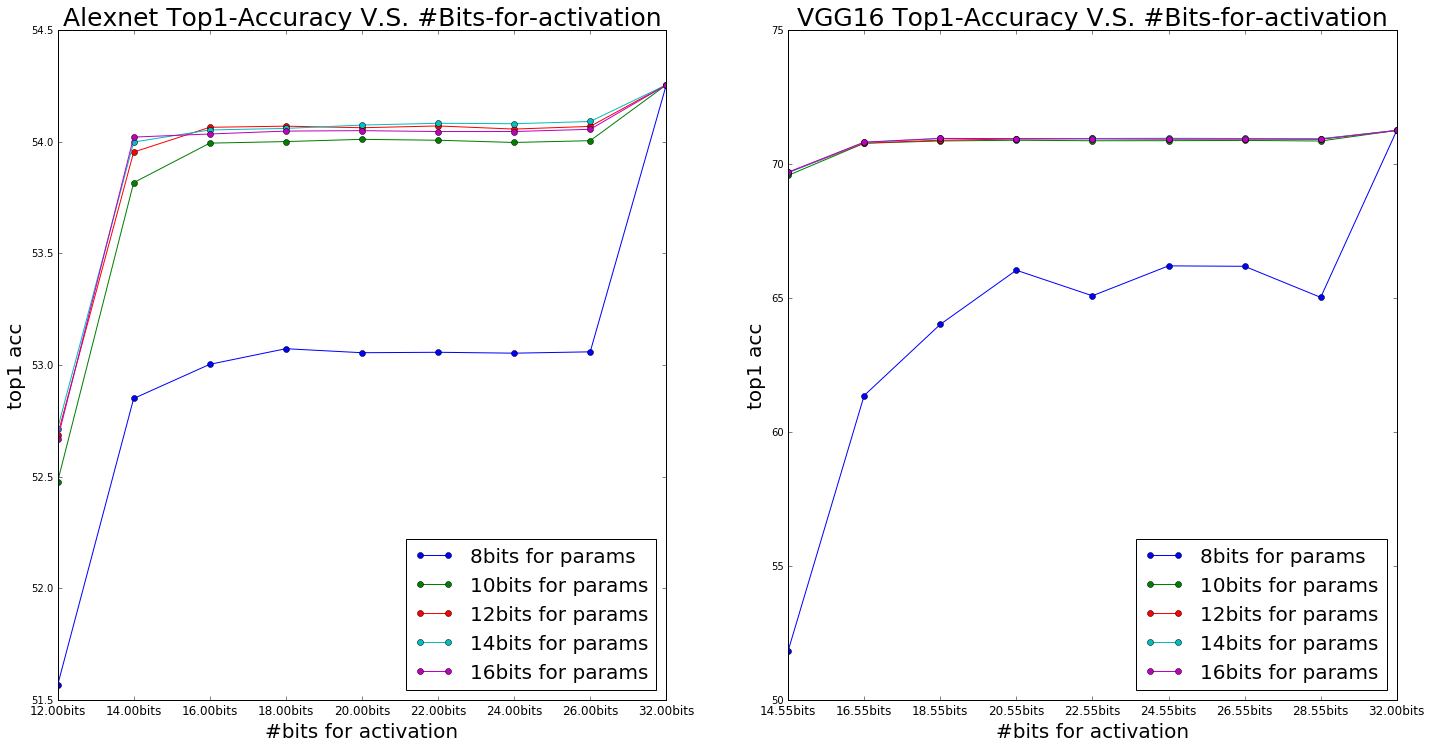

In [5]:
fig = plt.figure(figsize=(24, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(bitwidth_x, bitwidth_alex_ndarray[0], marker='o', label='8bits for params')
ax1.plot(bitwidth_x, bitwidth_alex_ndarray[1], marker='o', label='10bits for params')
ax1.plot(bitwidth_x, bitwidth_alex_ndarray[2], marker='o', label='12bits for params')
ax1.plot(bitwidth_x, bitwidth_alex_ndarray[3], marker='o', label='14bits for params')
ax1.plot(bitwidth_x, bitwidth_alex_ndarray[4], marker='o', label='16bits for params')

ax1.set_xticks(bitwidth_x)
ax1.set_xticklabels(bitwidth_alex_columns, fontsize=12)
ax1.set_xlabel('#bits for activation', fontsize=20)
ax1.set_ylabel('top1 acc', fontsize=20)
ax1.legend(loc='best', fontsize=20)
ax1.set_title('Alexnet Top1-Accuracy V.S. #Bits-for-activation', fontsize=25)

ax2.plot(bitwidth_x, bitwidth_vgg16_ndarray[0], marker='o', label='8bits for params')
ax2.plot(bitwidth_x, bitwidth_vgg16_ndarray[1], marker='o', label='10bits for params')
ax2.plot(bitwidth_x, bitwidth_vgg16_ndarray[2], marker='o', label='12bits for params')
ax2.plot(bitwidth_x, bitwidth_vgg16_ndarray[3], marker='o', label='14bits for params')
ax2.plot(bitwidth_x, bitwidth_vgg16_ndarray[4], marker='o', label='16bits for params')

ax2.set_xticks(bitwidth_x)
ax2.set_xticklabels(bitwidth_vgg16_columns, fontsize=12)
ax2.set_xlabel('#bits for activation', fontsize=20)
ax2.set_ylabel('top1 acc', fontsize=20)
ax2.legend(loc='best', fontsize=20)
ax2.set_title('VGG16 Top1-Accuracy V.S. #Bits-for-activation', fontsize=25)

plt.savefig('../vis/bitwidth.eps')
plt.show()